In [17]:
# research where people take pictures of cancer cells and such.
import os,sys

import pandas as pd
import networkx as nx
from importlib import reload
import inspect
import csv
import sys
from inspect import getmembers, isfunction

import numpy as np
import os, sys
from importlib import reload
from matplotlib import pyplot as plt
from tqdm import tqdm
import networkx as nx
os.chdir('..')
import ep_finder, lep_finder, graphs, ep_utils

In [18]:
os.getcwd()

'/Users/josephhenderson/Desktop/Research/EquitablePartitions/Data'

# Git Hub Social Network

In [ ]:
os.chdir('Social_networks/git_web_ml')

In [ ]:
git_df = pd.read_csv('musae_git_edges.csv')
git_nx = nx.read_edgelist('musae_git_edges.csv',delimiter=',',comments='id_1')

In [18]:
ep_dict, lep_list = ep_utils.getEquitablePartitions(git_nx,progress_bars=True)

Finding Coarsest EP...
 [####################################################################################################] 100%
COMPUTING LEPS	 |████████████████████████████████████████| 106123/106123 [100%] in 0.4s (268864.06/s) 


Nontrivial nodes progress:680/681
Total percentage on nontrivial nodes: 0.08002652519893899
Total pairs in partition elements: 439
Percentage of nontrivial nodes in pairs: 0.29101756711965526


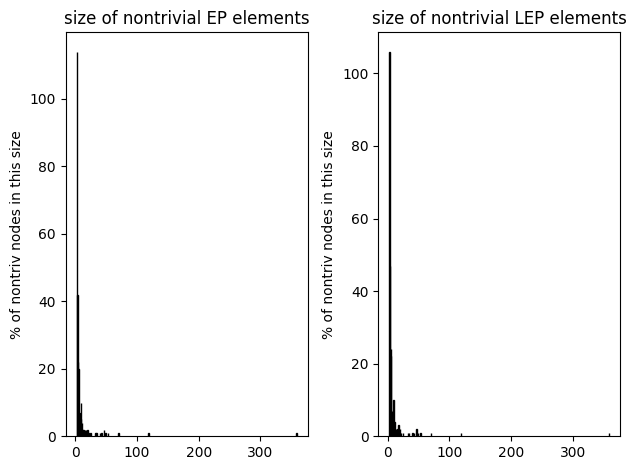

In [20]:
nontrivEp_dict_git,nontrivLep_list_git,hist_list, perc = graphs.NontrivialityData(git_nx,ep_dict,lep_list,return_vals=True,verbose=True)

In [21]:
#nontrivLep_list_git

# Local Decomposition of Dolores:

In [22]:
Dolores = graphs.getDolores()
relabeledDol = graphs.relabel(Dolores)
ep_dict, lep_list, coasestAndLocal = ep_utils.getEquitablePartitions(relabeledDol,progress_bars=False)

In [23]:
import pprint
fullSpec = np.round(nx.adjacency_spectrum(relabeledDol),3)
dolDivSpec = np.round(nx.adjacency_spectrum(graphs.genDivGraph(relabeledDol,ep_dict),3))

localSpec = graphs.GetLocalSpec(relabeledDol,ep_dict,lep_list)
againGDiv = graphs.genDivGraph(relabeledDol,ep_dict)

pretty = pprint.PrettyPrinter(width=30)
# print("Local spectrum decomposition: \n")
# pretty.pprint(localSpec)
# print('\n')
# print("full spectrum: \n")
# pretty.pprint(list(fullSpec))

/usr/local/lib/python3.10/site-packages/networkx/linalg/spectrum.py:110: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return sp.linalg.eigvals(nx.adjacency_matrix(G, weight=weight).todense())


In [24]:
ep_dict, lep_list, coarsestAndLocal = ep_utils.getEquitablePartitions(relabeledDol,progress_bars=True)

Finding Coarsest EP...
 [####################################################################################################] 100%
COMPUTING LEPS	 |████████████████████████████████████████| 25/25 [100%] in 0.0s (52669.39/s) 


Nontrivial nodes progress:2/3
Total percentage on nontrivial nodes: 0.9166666666666666
Total pairs in partition elements: 2
Percentage of nontrivial nodes in pairs: 0.18181818181818182


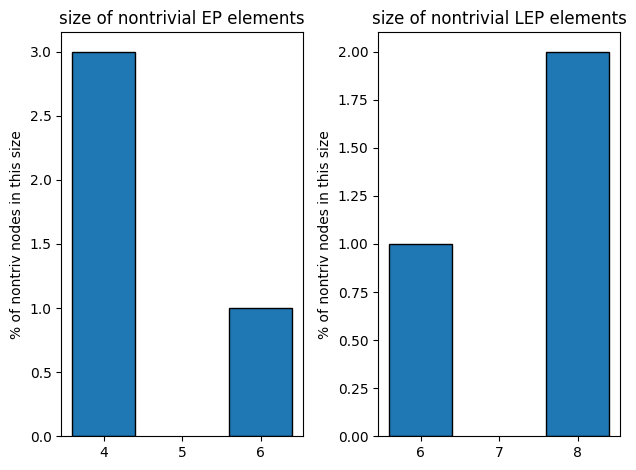

In [25]:
nontEP_dict_dol,nontLEP_list_dol,hist_list,perc_dol = graphs.NontrivialityData(relabeledDol,ep_dict,lep_list,return_vals=True,verbose=True)

# Facebook Graph Analysis:

In [4]:
#os.chdir('Data')
facebookG = graphs.getFacebookGraph()



In [5]:
relabeledGraph = graphs.relabel(facebookG)
ep_dict, lep_list, coarsestAndLocal = ep_utils.getEquitablePartitions(relabeledGraph,progress_bars=True)

Finding Coarsest EP...
4 iterations completed. EP algorithm complete!
COMPUTING LEPS	 |████████████████████████████████████████| 11596/11596 [100%] in 0.1s (181051.41/s) 


Nontrivial nodes progress:79/80
Total percentage on nontrivial nodes: 0.06288685318148056
Total pairs in partition elements: 51
Percentage of nontrivial nodes in pairs: 0.4015748031496063


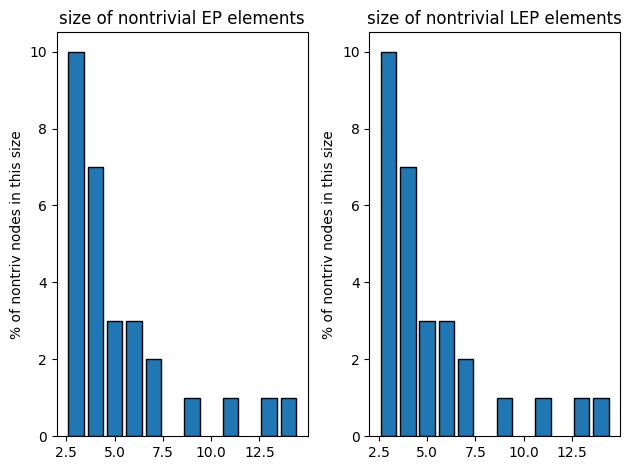

In [6]:
nontrivEp_dict,nontrivLep_list,hist_list_face, perc = graphs.NontrivialityData(relabeledGraph,ep_dict,lep_list,return_vals=True,verbose=True)

# Google Plus Network Analysis

## Note: this one is huge and takes jupyter a long time to do anything with start when have more time.

In [156]:
# This cell kills computers because of the size of the graph, tenga cuidado
gPlusNet = nx.read_edgelist("gplus_combined.txt.gz",create_using=nx.DiGraph)

In [157]:
relabeledGraph = graphs.relabel(gPlusNet)

In [159]:
ep_dict_gplus, lep_list_gplus, coarsestAndLocal = ep_utils.getEquitablePartitions(relabeledGraph,progress_bars=True)

Finding Coarsest EP...
 [####################################################################################################] 100%
COMPUTING LEPS	 |████████████████████████████████████████| 273895/273895 [100%] in 4.1s (66941.08/s) 


In [ ]:
nontrivEp_dict_gplus,nontrivLep_list_gplus,hist_list,perc = graphs.NontrivialityData(twitterNet,ep_dict_gplus,lep_list_gplus,return_vals=True,verbose=True,show_progress=False)

# Twitter Network Analysis:

In [6]:
os.chdir('Social_networks')

In [7]:
twitterNet = nx.read_edgelist("twitter_combined.txt.gz",create_using=nx.DiGraph)

In [20]:
# getting strongly connected components
total=0
for part in nx.strongly_connected_components(twitterNet):
    total+=1
print(total)

12248


In [9]:
ep_dict, lep_list = ep_utils.getEquitablePartitions(twitterNet, progress_bars=True)

COMPUTING LEPS...  |████████████████████████████████████████| 228385/228385 [100%] in 1.0s (221036.07/s) 


In [23]:
# QUESTION: can singletons all be in one lep but all in their own ep partition element?

81306

Nontrivial nodes progress:1312/1313
Total percentage on nontrivial nodes: 0.08166678965881977
Total pairs in partition elements: 661
Percentage of nontrivial nodes in pairs: 0.19909638554216869


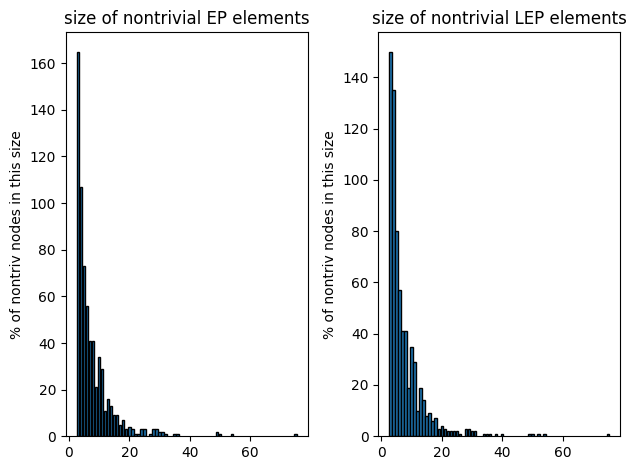

In [10]:
nontrivEp_dict,nontrivLep_list,hist_list,perc = graphs.NontrivialityData(twitterNet,ep_dict,lep_list,return_vals=True,verbose=True)

In [11]:
perc

0.08166678965881977

# Wiki vote Network Analysis:

In [38]:
os.getcwd()
#os.chdir('./Data/Social_Networks')
#os.chdir('Data')

'/Users/josephhenderson/Desktop/Research/EquitablePartitions/Data'

In [39]:
wiki_vote_net = nx.read_edgelist("wiki-Vote.txt.gz",create_using=nx.DiGraph) # changed it to undirected

In [40]:
total=0
for part in nx.strongly_connected_components(wiki_vote_net):
    total+=1
print(total)

5816


In [41]:
relabeledGraph = graphs.relabel(wiki_vote_net)

In [42]:
ep_dict_wiki, lep_list_wiki, coarsestAndLocal = ep_utils.getEquitablePartitions(relabeledGraph, progress_bars=True)

Finding Coarsest EP...
 [####################################################################################################] 100%
COMPUTING LEPS	 |████████████████████████████████████████| 6955/6955 [100%] in 0.0s (158351.05/s) 


Nontrivial nodes progress:1/2
Total percentage on nontrivial nodes: 0.6751932536893887
Total pairs in partition elements: 3
Percentage of nontrivial nodes in pairs: 0.0012489592006661116


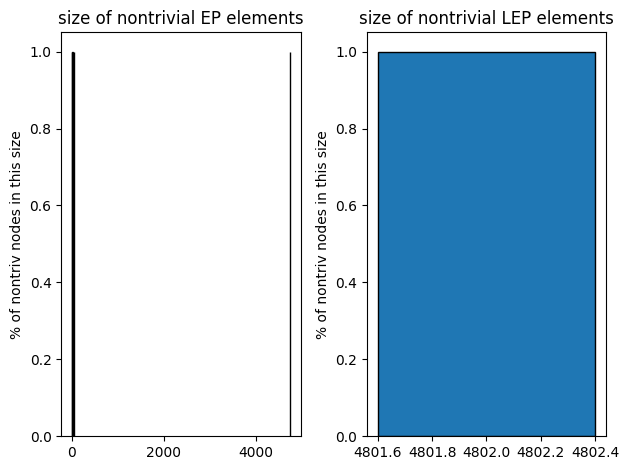

In [44]:
nontrivEp_dict_wiki,nontrivLep_list_wiki, hist_list,perc = graphs.NontrivialityData(wiki_vote_net,ep_dict_wiki,lep_list_wiki, return_vals=True, verbose=True)

In [46]:
#nx.number_connected_components(relabeledGraph)
# not implemented for directed type

In [48]:
nontrivEp_dict_wiki.keys()

dict_keys([0, 1, 2, 3, 1886, 2305, 2306])

In [49]:
# interesting, only 2 leps
nontrivLep_list_wiki

[{0, 1, 2, 3, 2305, 2306}, {1886}]

In [50]:
# size doesn't seem to be the correlation in the first lep.
for partEl in nontrivLep_list_wiki[0]:
    print(len(nontrivEp_dict_wiki[partEl]))

4734
47
2
12
5
2


# Deezer Network Analysis

In [12]:
os.chdir('deezer_europe')
deez_nx = nx.read_edgelist("deezer_europe_edges.csv",delimiter=',',comments='node_1')
os.chdir('..')

In [13]:
len(deez_nx)  # checking to make sure graph was read in correctly

28281

In [15]:
relabeledGraph = graphs.relabel(deez_nx)
ep_dict_deez,lep_list_deez = ep_utils.getEquitablePartitions(relabeledGraph,progress_bars=True)

COMPUTING LEPS...  |████████████████████████████████████████| 75097/75097 [100%] in 0.3s (296419.89/s) 


Nontrivial nodes progress:1286/1287
Total percentage on nontrivial nodes: 0.16134507266362574
Total pairs in partition elements: 769
Percentage of nontrivial nodes in pairs: 0.3370589524435678


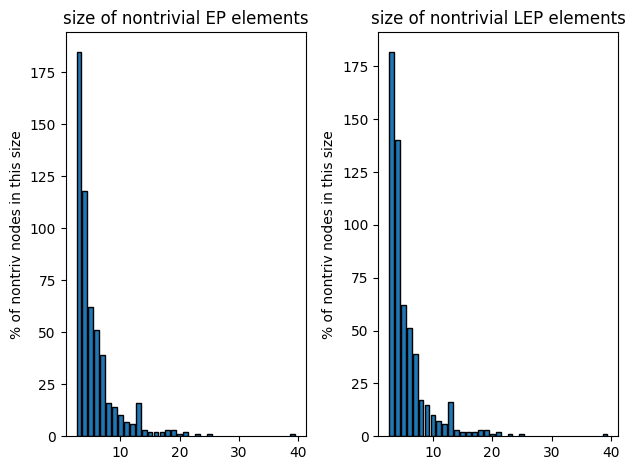

In [16]:
nontEP_dict_deez, nontLep_list_deez, hist_list, perc = graphs.NontrivialityData(relabeledGraph,ep_dict_deez,lep_list_deez,return_vals=True,verbose=True)



In [ ]:
perc

# Epinions Trust Network Analysis:

In [60]:
#os.chdir('EquitablePartitions/Data')

In [61]:
os.getcwd()

'/Users/josephhenderson/Desktop/Research/EquitablePartitions/Data'

In [101]:
graph = graphs.relabel(nx.read_edgelist("soc-Epinions1.txt.gz",create_using=nx.DiGraph))

In [102]:
ep_dict_eph, lep_list_eph,_ = ep_utils.getEquitablePartitions(graph)

Finding Coarsest EP...
 [####################################################################################################] 100%
COMPUTING LEPS	 |████████████████████████████████████████| 104119/104119 [100%] in 0.4s (246912.09/s) 


Nontrivial nodes progress:3712/3713
Total percentage on nontrivial nodes: 0.5969372290093439
Total pairs in partition elements: 2162
Percentage of nontrivial nodes in pairs: 0.09546307539463517


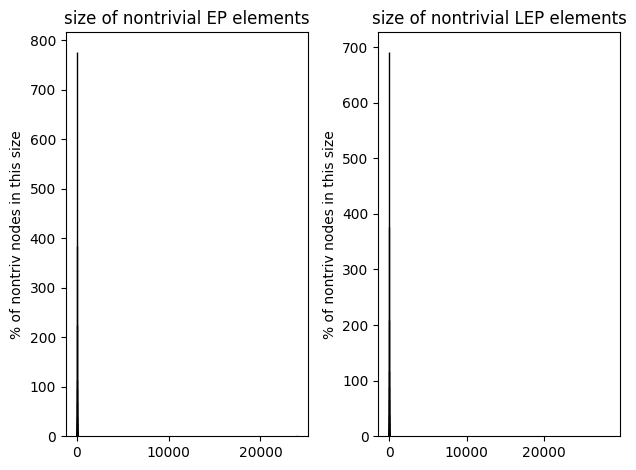

In [103]:
nontEp_dict_eph,nontLep_list_eph, hist_list, perc = graphs.NontrivialityData(graph,ep_dict_eph,lep_list_eph,return_vals = True,verbose = True)

In [104]:
perc

0.5969372290093439

# Twitch Network Analysis:

In [70]:
graph = graphs.relabel(nx.read_edgelist('large_twitch_edges.csv',delimiter=','))

In [71]:
ep_dict_twitch, lep_list_twitch,_ = ep_utils.getEquitablePartitions(graph)

Finding Coarsest EP...
 [####################################################################################################] 100%
COMPUTING LEPS	 |████████████████████████████████████████| 501757/501757 [100%] in 4.1s (122968.03/s) 


Nontrivial nodes progress:263/363

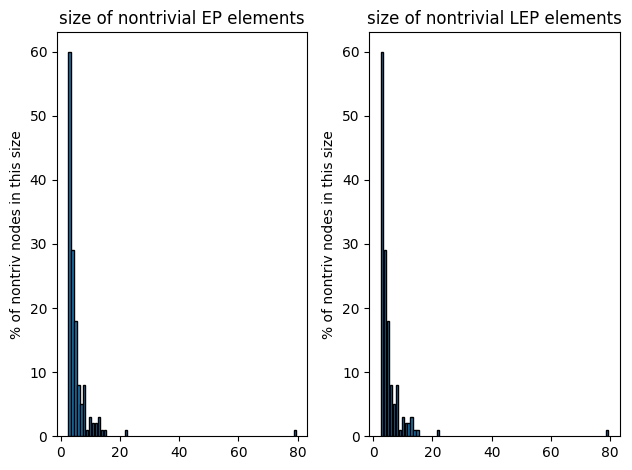

In [73]:
nontEp_dict_eph,nontLep_list_eph, hist_list, perc = graphs.NontrivialityData(graph,ep_dict_twitch,lep_list_twitch,verbose=True,return_vals=True)

In [74]:
perc

0.00729853196602346

# Lasftm Asia Social Network analysis

In [144]:
os.chdir('Data/lasftm_asia')
graph_lasftm = graphs.relabel(nx.read_edgelist('lastfm_asia_edges.csv',delimiter=','))
graph_lasftm_directed = graphs.relabel(nx.read_edgelist('lastfm_asia_edges.csv',delimiter=',',create_using=nx.DiGraph))
os.chdir('..')

In [145]:
ep_dict_lasftm, lep_list_lasftm,_ = ep_utils.getEquitablePartitions(graph_lasftm)
ep_las_dir, lep_las_dir,_ = ep_utils.getEquitablePartitions(graph_lasftm_directed)

Finding Coarsest EP...
 [####################################################################################################] 100%
COMPUTING LEPS	 |████████████████████████████████████████| 21103/21103 [100%] in 0.1s (261577.08/s) 
Finding Coarsest EP...
 [####################################################################################################] 100%
COMPUTING LEPS	 |████████████████████████████████████████| 11626/11626 [100%] in 0.0s (284090.46/s) 


Total percentage on nontrivial nodes: 0.12300026226068712
Total pairs in partition elements: 254
Percentage of nontrivial nodes in pairs: 0.5415778251599147


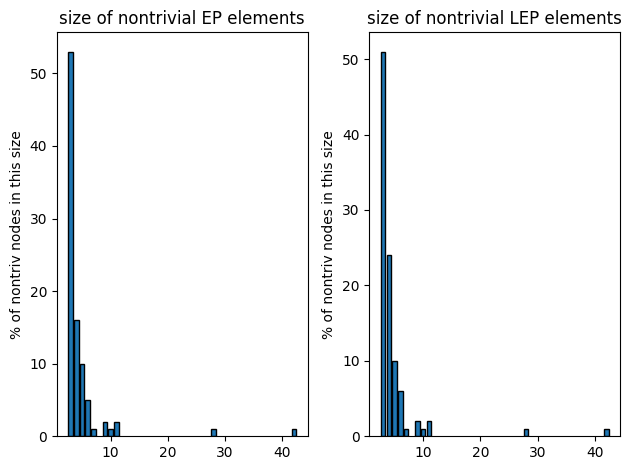

Total percentage on nontrivial nodes: 0.5253081563073695
Total pairs in partition elements: 145
Percentage of nontrivial nodes in pairs: 0.07239141288067898


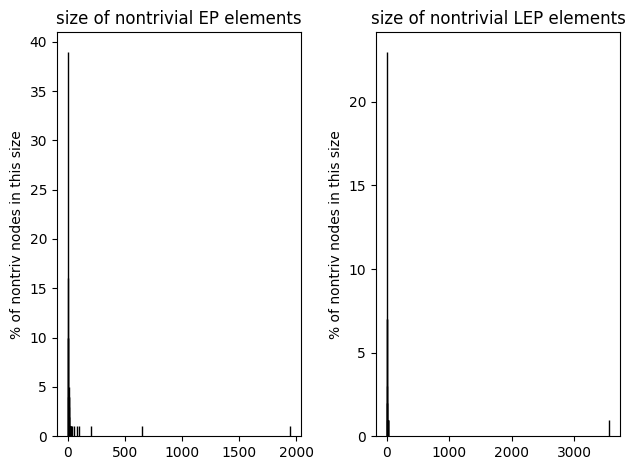

In [146]:
nontEp_dict_lasftm,nontLep_list_lasftm, hist_list, perc = graphs.NontrivialityData(graph_lasftm,ep_dict_lasftm,lep_list_lasftm,verbose=True,return_vals=True,show_progress=False)
nontEp_las_dir,nontLep_las_dir, hist_list_dir, perc_dir = graphs.NontrivialityData(graph_lasftm,ep_las_dir,lep_las_dir,verbose=True,return_vals=True,show_progress=False)

In [147]:
perc

0.12300026226068712

In [148]:
perc_dir

0.5253081563073695

# Slashdot Directed social network analysis

In [149]:
graph = graphs.relabel(nx.read_edgelist("soc-slashdot0811.txt.gz",create_using=nx.DiGraph))

In [150]:
ep_dict_slash, lep_list_slash,_ = ep_utils.getEquitablePartitions(graph)

Finding Coarsest EP...
 [####################################################################################################] 100%
COMPUTING LEPS	 |████████████████████████████████████████| 181630/181630 [100%] in 0.7s (252346.64/s) 


Total percentage on nontrivial nodes: 0.28784901758014475
Total pairs in partition elements: 2775
Percentage of nontrivial nodes in pairs: 0.24923657266031973


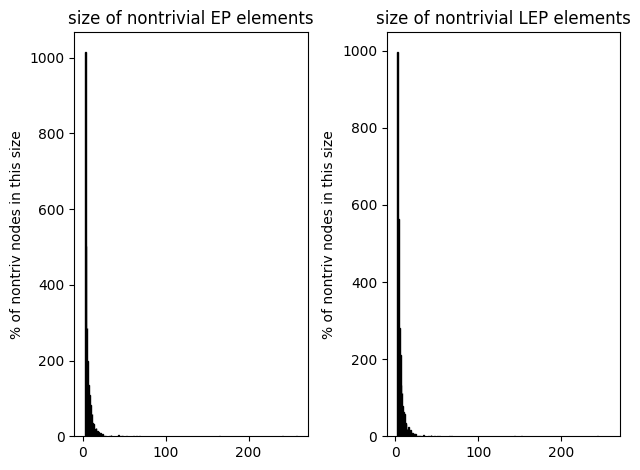

In [151]:
nontEp_dict_slash,nontLep_list_slash, hist_list, perc = graphs.NontrivialityData(graph,ep_dict_slash,lep_list_slash,verbose=True,return_vals=True,show_progress=False)

In [152]:
perc

0.28784901758014475

# Facebook large page-page network analysis

In [11]:

os.chdir('Social_networks/facebook_large')
face_large = graphs.relabel(nx.read_edgelist("musae_facebook_edges.csv",delimiter=',',comments='id_1'))
os.chdir('..')

In [12]:
ep_dict_face_large, lep_list_face_large ,_ = ep_utils.getEquitablePartitions(face_large)

Finding Coarsest EP...
6 iterations completed. EP algorithm complete!
COMPUTING LEPS	 |████████████████████████████████████████| 63775/63775 [100%] in 0.2s (260334.21/s) 


Total percentage on nontrivial nodes: 0.08469069870939029
Total pairs in partition elements: 489
Percentage of nontrivial nodes in pairs: 0.5139253809774041


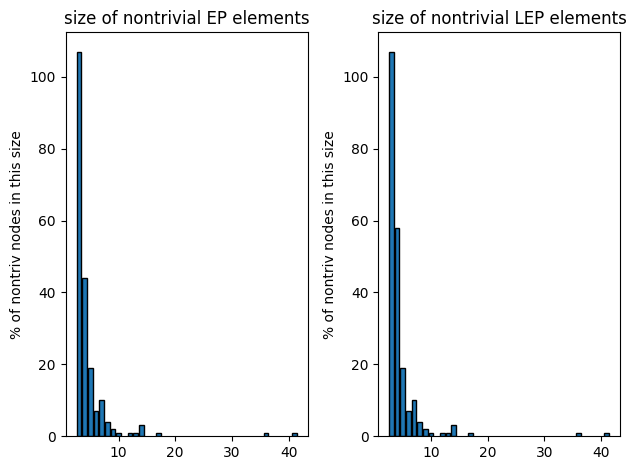

In [13]:
nontEp_dict_face_large,nontLep_list_face_large, hist_list, perc = graphs.NontrivialityData(face_large,ep_dict_face_large,lep_list_face_large,verbose=True,return_vals=True,show_progress=False)